# Setup

In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=4,threading_layer='omp')

In [2]:
import time
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

from consav.misc import elapsed
from HousingModel import HousingModelClass
from HousingModel import solve_model
import figs

# Solve

In [3]:
t0 = time.time()

model = HousingModelClass(name='baseline')
model.load_data()

print(f'model setup in {elapsed(t0)}\n')
print(model)

model setup in 24.7 secs

Modelclass: HousingModelClass

Parameters:
 T = 55 [int64]
 TR = 37 [int64]
 age_min = 25 [int64]
 t_min = 0 [int64]
 rho_p = 0.99 [float64]
 sigma_p = 0.3 [float64]
 G = array(float64, 1d, C) with shape = (55,)
 retirement_drop = 1.0 [float64]
 ra = 0.035 [float64]
 rm = 0.04 [float64]
 rb = 0.07 [float64]
 ph = 1.0 [float64]
 rh = 0.045 [float64]
 delta = 0.0075 [float64]
 gamma_m = 0.05 [float64]
 gamma_b = 0.1 [float64]
 tau_f = 0.1 [float64]
 tau_h = 0.2 [float64]
 tau_ht = 0.01 [float64]
 kappa_p = 4.0 [float64]
 kappa_h = 0.95 [float64]
 kappa_h_mortgage = 0.8 [float64]
 grid_h = array(float64, 1d, C) with shape = (10,)
 grid_ht = array(float64, 1d, C) with shape = (10,)
 Niota = 2 [int64]
 Delta_iota = 0 [int64]
 beta_mean = 0.96 [float64]
 beta_low = 0.85 [float64]
 beta_high = 0.99 [float64]
 rho = 2.0 [float64]
 nu = 20.0 [float64]
 zeta = 8.0 [float64]
 alpha = 0.7 [float64]
 omega = 1.2 [float64]
 sigma = 0.025 [float64]
 sigma_agg = 0.05 [float64

In [4]:
model.solve(t_min=model.par.T-2)

setup grids in 0.0 secs
t = 54 solved in 1.0 mins 17 secs[pd: 10.1 secs, negm: 6.4 secs, evaluate: 6.5 secs, nvfi_r: 18.5 secs, nvfi_o: 35.2 secs]
t = 53 solved in 12.9 secs[pd: 0.0 secs, negm: 0.5 secs, evaluate: 0.1 secs, nvfi_r: 0.2 secs, nvfi_o: 12.2 secs]
model solved in 1.0 mins 30 secs


In [5]:
#%lprun -f solve_model model.solve(model.par.T-5)

In [6]:
model.solve()

setup grids in 0.0 secs
t = 54 solved in 12.9 secs[pd: 0.0 secs, negm: 0.4 secs, evaluate: 0.1 secs, nvfi_r: 0.2 secs, nvfi_o: 12.2 secs]
t = 53 solved in 13.1 secs[pd: 0.0 secs, negm: 0.5 secs, evaluate: 0.1 secs, nvfi_r: 0.2 secs, nvfi_o: 12.3 secs]
t = 52 solved in 13.5 secs[pd: 0.0 secs, negm: 0.4 secs, evaluate: 0.1 secs, nvfi_r: 0.2 secs, nvfi_o: 12.7 secs]
t = 51 solved in 13.2 secs[pd: 0.0 secs, negm: 0.4 secs, evaluate: 0.1 secs, nvfi_r: 0.2 secs, nvfi_o: 12.5 secs]
t = 50 solved in 13.1 secs[pd: 0.0 secs, negm: 0.5 secs, evaluate: 0.1 secs, nvfi_r: 0.2 secs, nvfi_o: 12.3 secs]
t = 49 solved in 13.0 secs[pd: 0.0 secs, negm: 0.4 secs, evaluate: 0.1 secs, nvfi_r: 0.2 secs, nvfi_o: 12.4 secs]
t = 48 solved in 12.9 secs[pd: 0.0 secs, negm: 0.4 secs, evaluate: 0.1 secs, nvfi_r: 0.2 secs, nvfi_o: 12.2 secs]
t = 47 solved in 13.1 secs[pd: 0.0 secs, negm: 0.4 secs, evaluate: 0.1 secs, nvfi_r: 0.2 secs, nvfi_o: 12.4 secs]
t = 46 solved in 16.3 secs[pd: 0.0 secs, negm: 0.5 secs, evaluat

## Value functions

In [7]:
par = model.par 
ts = [0] #[par.T-1,par.T-2,par.T-3,par.T-4,par.T-5,par.T-6,par.T-7,par.T-8,40,30,20,10,0]

### Post decision

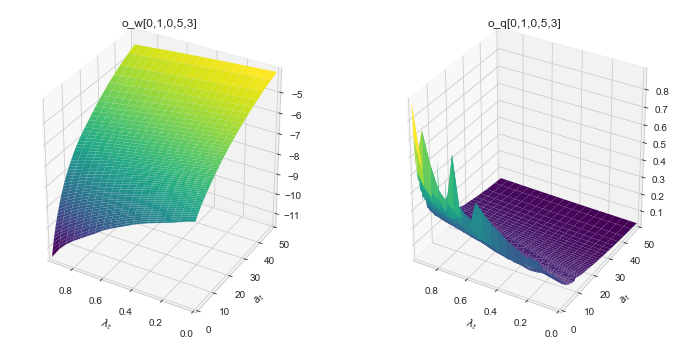

In [8]:
for t in ts:
    i_beta = par.Nbeta//2
    iota = 0
    i_h = par.Nh//2
    i_p = par.Np//2
    figs.post_decision_owner(model,['w','q'],t,i_beta,iota,i_h,i_p)

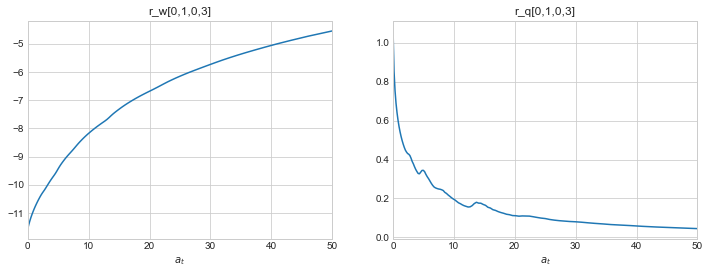

In [9]:
for t in ts:
    i_beta = par.Nbeta//2
    i_ht = 0
    i_p = par.Np//2
    figs.post_decision_renter(model,['w','q'],t,i_beta,i_ht,i_p)

### NEGM

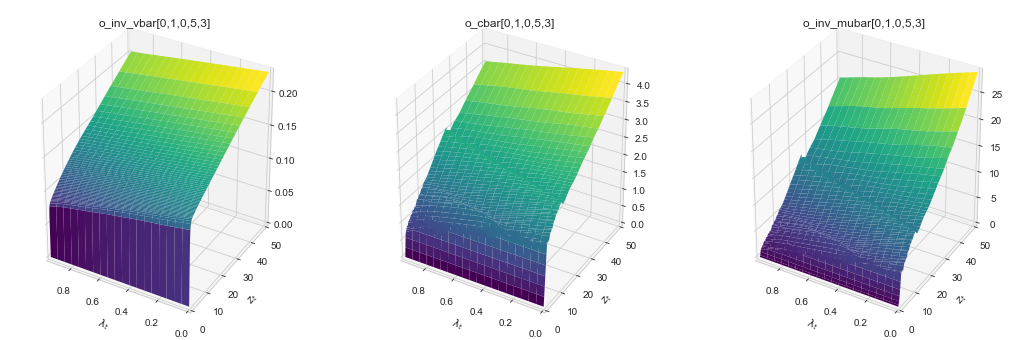

In [10]:
for t in ts:
    if t >= par.T-1: continue
    i_beta = par.Nbeta//2
    iota = 0
    i_h = par.Nh//2
    i_p = par.Np//2
    figs.negm_owner(model,['inv_vbar','cbar','inv_mubar'],t,i_beta,iota,i_h,i_p)

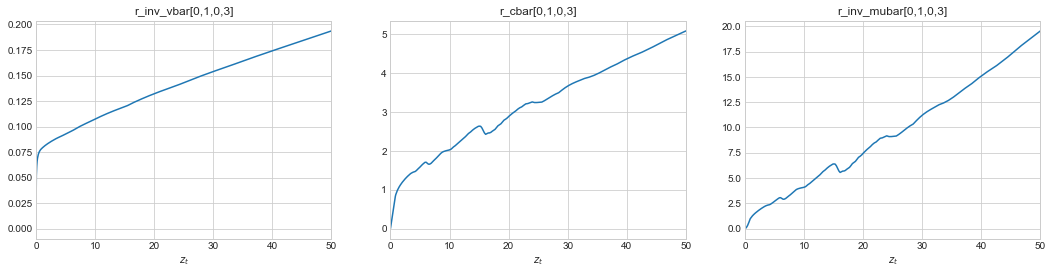

In [11]:
for t in ts:
    if t >= par.T-1: continue
    i_beta = par.Nbeta//2
    iota = 0
    i_ht = 0
    i_p = par.Np//2
    figs.negm_renter(model,['inv_vbar','cbar','inv_mubar'],t,i_beta,i_ht,i_p)

## Intermediate

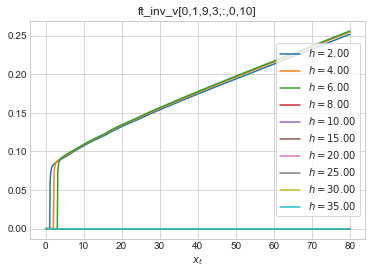

In [12]:
for t in ts:
    if t >= par.T-1: continue
    i_beta = par.Nbeta//2        
    iota = 0
    i_p = par.Np//2
    i_LTV = par.NLTV//2
    figs.ft(model,t,i_beta,i_p,iota,i_LTV)

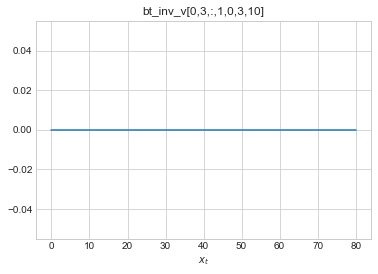

In [13]:
for t in ts:
    if t >= par.T-1: continue
    i_beta = par.Nbeta//2            
    iota = 0
    i_h = par.Nh//3
    i_p = par.Np//2
    i_LTV = par.NLTV//2
    figs.bt(model,t,i_beta,i_p,iota,i_h,i_LTV)

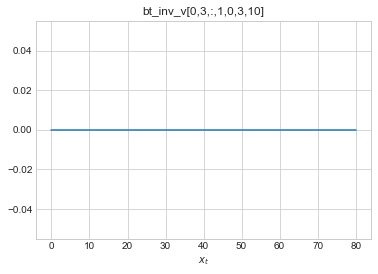

In [14]:
for t in ts:
    if t >= par.T-1: continue
    i_beta = par.Nbeta//2        
    iota = 0
    i_h = par.Nh//3
    i_p = par.Np//2
    i_LTV = par.NLTV//2
    figs.bt(model,t,i_beta,i_p,iota,i_h,i_LTV)

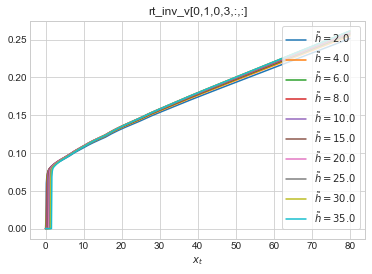

In [15]:
for t in ts:
    if t >= par.T-1: continue
    i_beta = par.Nbeta//2   
    i_ht_lag = 0
    i_p = par.Np//2  
    figs.rt(model,t,i_beta,i_ht_lag,i_p)

### Beginning-of-period

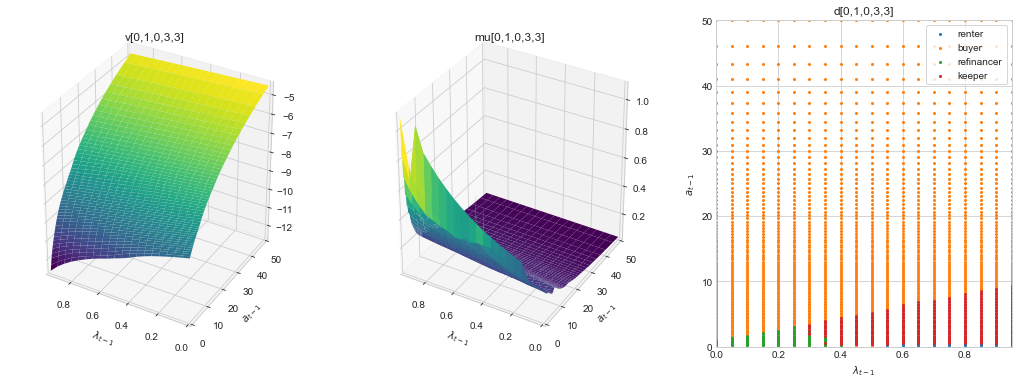

In [16]:
for t in ts:
    i_beta = par.Nbeta//2
    iota_lag = 0
    i_h_lag = par.Nh//3
    i_p_lag = par.Np//2
    figs.owner(model,['v','mu','d'],t,i_beta,iota_lag,i_h_lag,i_p_lag)

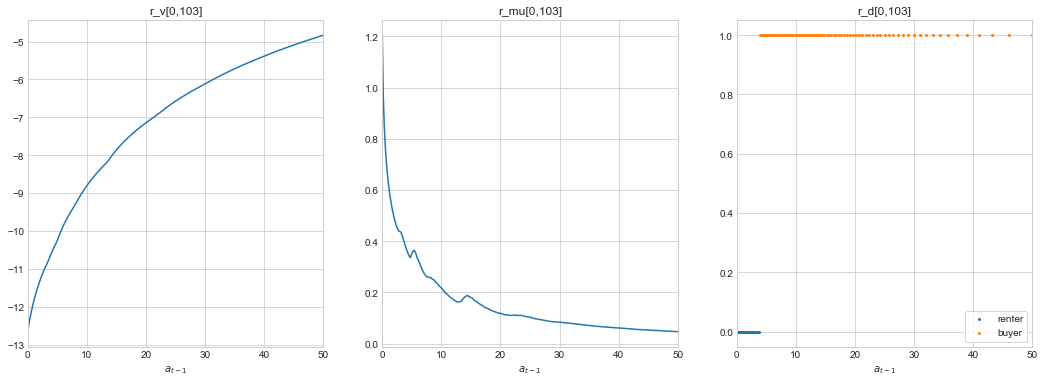

In [17]:
for t in ts:
    i_beta = par.Nbeta//2   
    i_ht_lag = 0    
    i_p_lag = par.Np//2
    figs.renter(model,['v','mu','d'],t,i_beta,i_ht_lag,i_p_lag)

# Discrete decision

# Simulate

In [18]:
model.simulate()

model simulated in 1.0 mins 34 secs


## Life-cycle profiles

In [19]:
model.load_data()

data is normalized with mean income at age 25 = 260,972.2


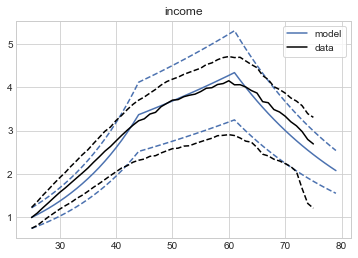

<Figure size 432x288 with 0 Axes>

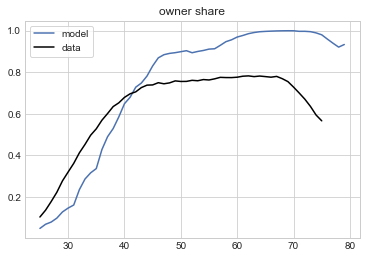

<Figure size 432x288 with 0 Axes>

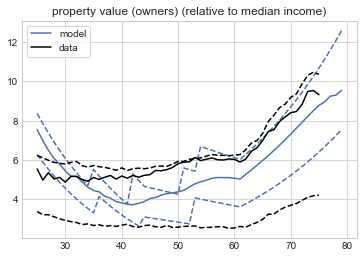

<Figure size 432x288 with 0 Axes>

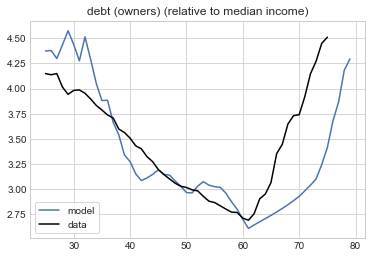

<Figure size 432x288 with 0 Axes>

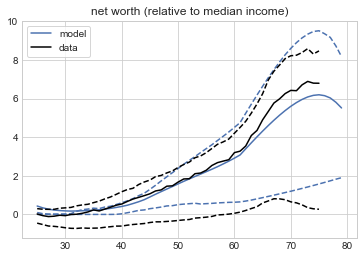

<Figure size 432x288 with 0 Axes>

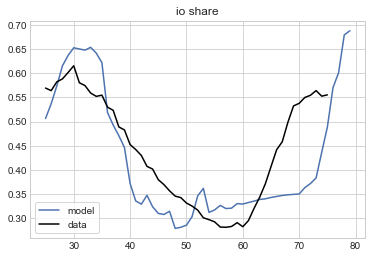

<Figure size 432x288 with 0 Axes>

In [20]:
figs.calibration(model)

### Income

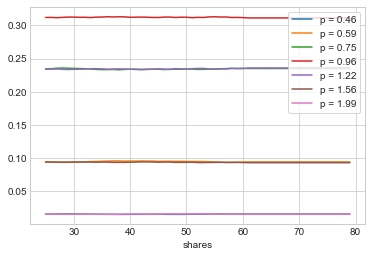

In [21]:
figs.life_cycle_income(model)

### Consumption-saving

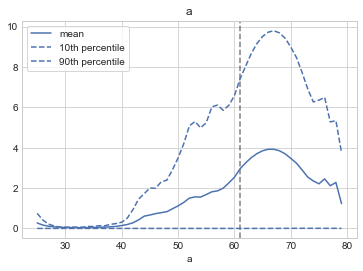

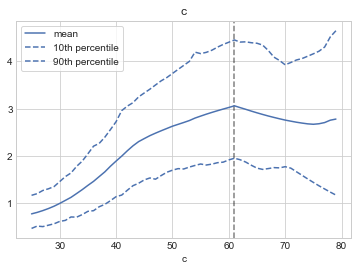

In [22]:
figs.life_cycle(model,'a')
figs.life_cycle(model,'c')

### Housing

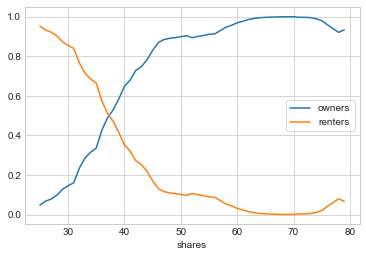

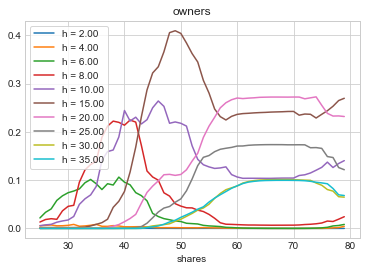

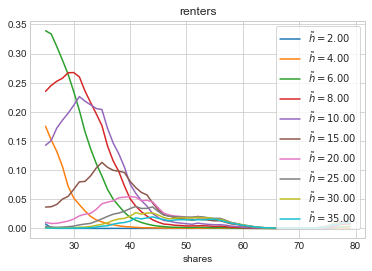

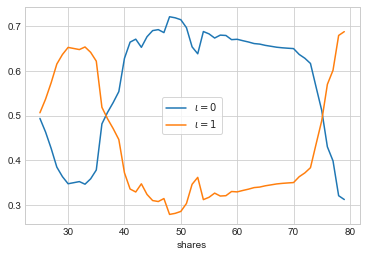

In [23]:
figs.life_cycle_housing(model)
figs.life_cycle_housing(model,owners=True)
figs.life_cycle_housing(model,renters=True)
figs.life_cycle_io(model)

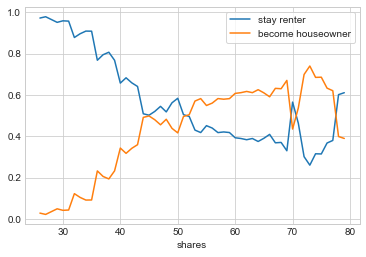

In [24]:
figs.life_cycle_d_renter(model)

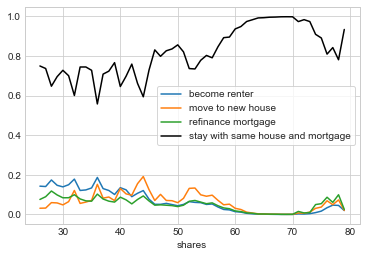

In [25]:
figs.life_cycle_d_owner(model)

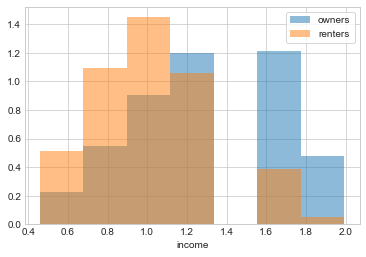

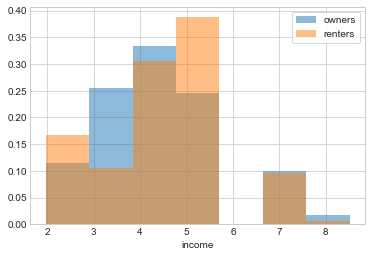

In [26]:
figs.life_cycle_housing_income_dist(model,25)
figs.life_cycle_housing_income_dist(model,45)

# Policy experiment

In [27]:
model_noio = HousingModelClass(name='baseline',Niota=1)
model_noio.load_data()

model_noio.solve()
model_noio.simulate()

setup grids in 0.0 secs
t = 54 solved in 1.0 mins 12 secs[pd: 11.2 secs, negm: 7.1 secs, evaluate: 6.9 secs, nvfi_r: 18.1 secs, nvfi_o: 28.8 secs]
t = 53 solved in 5.4 secs[pd: 0.0 secs, negm: 0.2 secs, evaluate: 0.0 secs, nvfi_r: 0.2 secs, nvfi_o: 5.0 secs]
t = 52 solved in 5.5 secs[pd: 0.0 secs, negm: 0.3 secs, evaluate: 0.1 secs, nvfi_r: 0.2 secs, nvfi_o: 5.0 secs]
t = 51 solved in 5.4 secs[pd: 0.0 secs, negm: 0.3 secs, evaluate: 0.0 secs, nvfi_r: 0.2 secs, nvfi_o: 4.9 secs]
t = 50 solved in 5.4 secs[pd: 0.0 secs, negm: 0.2 secs, evaluate: 0.0 secs, nvfi_r: 0.2 secs, nvfi_o: 5.0 secs]
t = 49 solved in 5.4 secs[pd: 0.0 secs, negm: 0.3 secs, evaluate: 0.0 secs, nvfi_r: 0.2 secs, nvfi_o: 5.0 secs]
t = 48 solved in 5.4 secs[pd: 0.0 secs, negm: 0.3 secs, evaluate: 0.0 secs, nvfi_r: 0.2 secs, nvfi_o: 5.0 secs]
t = 47 solved in 5.4 secs[pd: 0.0 secs, negm: 0.2 secs, evaluate: 0.1 secs, nvfi_r: 0.2 secs, nvfi_o: 5.0 secs]
t = 46 solved in 5.5 secs[pd: 0.0 secs, negm: 0.3 secs, evaluate: 0.1

## Comparison figures

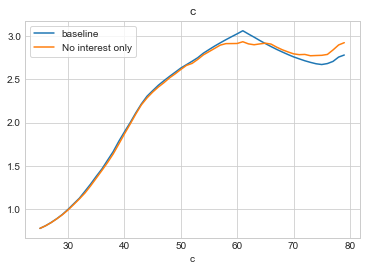

<Figure size 432x288 with 0 Axes>

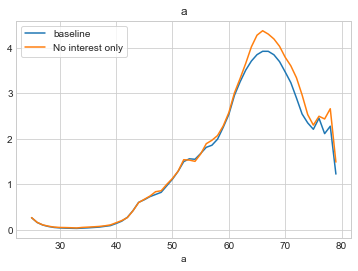

<Figure size 432x288 with 0 Axes>

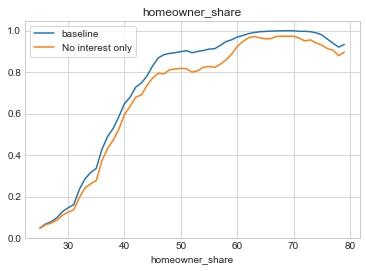

<Figure size 432x288 with 0 Axes>

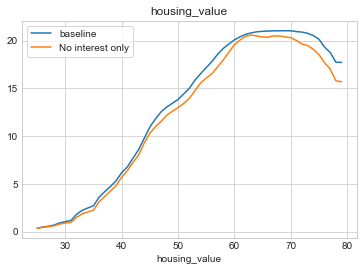

<Figure size 432x288 with 0 Axes>

In [28]:
model_noio.name = 'noio'
figs.life_cycle_compare([model,model_noio],'c')
figs.life_cycle_compare([model,model_noio],'a')
figs.life_cycle_compare([model,model_noio],'homeowner_share')
figs.life_cycle_compare([model,model_noio],'housing_value')